# <center>尝鲜tensorflow2.0</center>

By [青衣极客 Blue Geek](https://mp.weixin.qq.com/s/fBHCUYkfMAGGQpw9V6j1BA)

In 2019-10-01

这几天关于tensorflow 2.0版本发布的消息铺天盖地，但其实tf官方之前就发布过新版tensorflow的测试版本。我是从tensorflow 0.10版本开始使用的，听说tf在2.0版本中使用了动态图的概念，就尝试了一下官方发布的测试版，不得不为tensorflow采用动态图而欢呼。前几天2.0版本正式发布，会有更多研究机器学习的朋友用到这个最新版本的tensorflow。本文就讨论一下使用tensorflow 2.0版本的一些最基本的问题，以避免大家浪费时间在一些鸡毛蒜皮的小事上。也带大家尝尝鲜，然后可以决定要不要拥抱tensorflow 2.0。

## 1. 使用virtualenv配置tensorflow环境
尝鲜一个模块毕竟还是有风险的，特别是对于正在使用旧版本的模块开发的时候。这种情况下virtualenv就派上用场了。使用virtualenv创建虚拟环境，在虚拟环境中安装新版的tensorflow对系统中安装的旧版本就没有影响。即使发现新版模块有问题直接删掉虚拟环境就行，不影响正在进行的工作。

### (a) 创建虚拟环境

   `virtualenv -p python3 --no-site-packages tf2.0-py3`
  
### (b) 启动虚拟环境

   `source tf2.0-py3/bin/activate`
   
### (c) 在虚拟环境下安装tensorflow

   `pip3 install tensorflow`
   
   由于一些众所周知的原因，直接使用pip下载安装tensorflow是非常慢的，这就需要一点随机应变了。pip在下载模块时会显示下载的地址，我们可以把这个地址复制下来，使用具备断点续传功能下载器或者在一些特殊的网络环境中下载下来。
   
   然后就可以使用pip从whl文件安装了，`pip3 install tensorflow-2.0.0-cp37-cp37m-macosx_10_11_x86_64.whl`
   安装过程还会下载一些比较小的模块，速度慢点也就忍着吧。如果在特殊网络环境中，可以通过export http_proxy和htts_proxy来设置终端的网络环境。
   
### (d) 给当前环境安装ipykernel

   `pip3 install ipykernel`
   
### (e) 将当前虚拟环境设置为notebook中的一个kernel

   `python3 -m ipykernel install --user --name tf2.0-py`

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


## 2. Hello World

如果用一句话来形容你是程序员，不能说跟编程语言相关的东西，你该怎么做？那就是“Hello World”。我们也采用这种方式来测试一下tensorflow中最基本的字符串常量。

In [4]:
a = tf.constant('Hello, World!, Hello Tensorfloew, Hello 中国')
print(a)

x1 = tf.constant(1.2)
x2 = tf.constant(2.4)
print(x1+x2)

tf.Tensor(b'Hello, World!, Hello Tensorfloew, Hello \xe4\xb8\xad\xe5\x9b\xbd', shape=(), dtype=string)
tf.Tensor(3.6000001, shape=(), dtype=float32)


直接学习tf2的初学者或许不会对这个最基本的演示感到惊奇，但是从tf0.x和tf1.x开始使用tensorflow的朋友们应该会感到惊艳。毕竟在2.0之前的版本中，tensorflow采用的是静态图的方式来运行的，意思就是说，需要先将图构建完成，然后在一个Session环境中启动图来得到最终结果。静态图大概是很多初学者放弃使用tensorflow转投pytorch怀抱的一个重要原因，因为代码实在太晦涩，而且开发效率比较低下。在2.0版本中，tensorflow跟随了其他一些开放框架的动态图概念，不得不说这是开发者的福音。当然，对于从之前版本迁移到2.0版本的朋友来说还是会痛苦相当长的一段时间，但是对于初学者而言可以直接从最新的2.0版本开始，完全不要理会之前的那个原始状态的版本。

## 3. 训练一个官网小模型

tensorflow官网上有个简单的线性模型实验，用这个实验来尝鲜是再合适不过。代码量比较小，方便理解，过程比较清晰，也便于接受。

### (1) 定义模型和相关操作

首先定义一个模型，可以使用面向对象的方式，当然也可以使用面向过程的方式。这里使用一个对象来封装模型的创建和训练相关的操作，然后测试一下其中的函数功能。在以前的版本中，这种中间输出的做法简直不敢想象。

In [45]:
class Model:
    def __init__(self):
        # 定义两个模型参数
        self.W = tf.Variable(1.0)
        self.b = tf.Variable(0.0)
    
    def __call__(self, x):
        # 简单的线性模型
        return self.W * x + self.b
    
    @staticmethod
    def loss(pred_y, gt_y):
        # L2损失
        return tf.reduce_mean(tf.square(pred_y - gt_y))
    
    # 用于训练的函数
    def train(self, inputs, gt_y, learning_rate):
        with tf.GradientTape() as t:
            cur_loss = self.loss(self(inputs), gt_y)
        dW, db = t.gradient(cur_loss, [self.W, self.b])
        # 更细模型参数
        self.W.assign_sub(learning_rate * dW)
        self.b.assign_sub(learning_rate * db)
        # 返回损失值
        return cur_loss
    
model = Model()
print('forward = ', model(3))
print('loss = ', model.loss(10.0, 8))

forward =  tf.Tensor(3.0, shape=(), dtype=float32)
loss =  tf.Tensor(4.0, shape=(), dtype=float32)


### (2) 生成训练数据

生成一组训练数据，并采用一个简单的线性映射和10%的随机噪声产生对应真值。

<IPython.core.display.Javascript object>


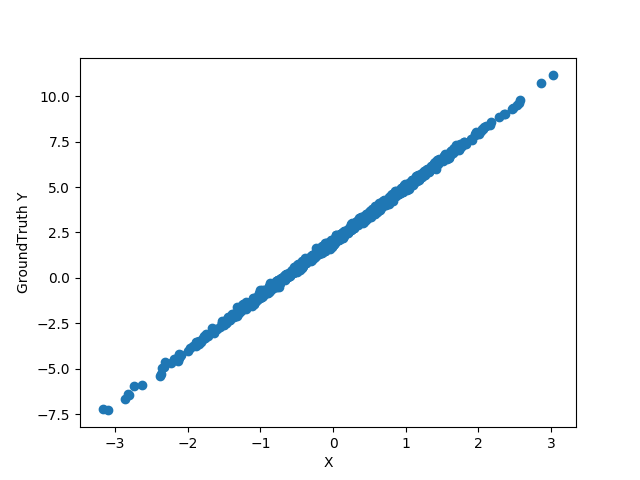

In [42]:
%matplotlib notebook
import matplotlib.pyplot as plt

num_samples = 1000
inputs = tf.random.normal(shape=[num_samples])
noise = 0.1 * tf.random.normal(shape=[num_samples])
gt_Y = inputs * 3 + 2.0 + noise
plt.figure()
plt.scatter(inputs, gt_Y)
plt.xlabel('X')
plt.ylabel('GroundTruth Y')
plt.show()

### (3) 训练模型
训练模型的过程也非常简单，完全抛弃了之前那种丑陋的Session设计实在是大快人心。

epoch:0 - W=1.00, b=0.00, loss=8.12
epoch:1 - W=1.39, b=0.42, loss=5.16
epoch:2 - W=1.71, b=0.75, loss=3.29
epoch:3 - W=1.96, b=1.01, loss=2.09
epoch:4 - W=2.17, b=1.22, loss=1.34
epoch:5 - W=2.33, b=1.38, loss=0.85
epoch:6 - W=2.46, b=1.51, loss=0.55
epoch:7 - W=2.57, b=1.61, loss=0.35
epoch:8 - W=2.65, b=1.70, loss=0.23
epoch:9 - W=2.72, b=1.76, loss=0.15


<IPython.core.display.Javascript object>


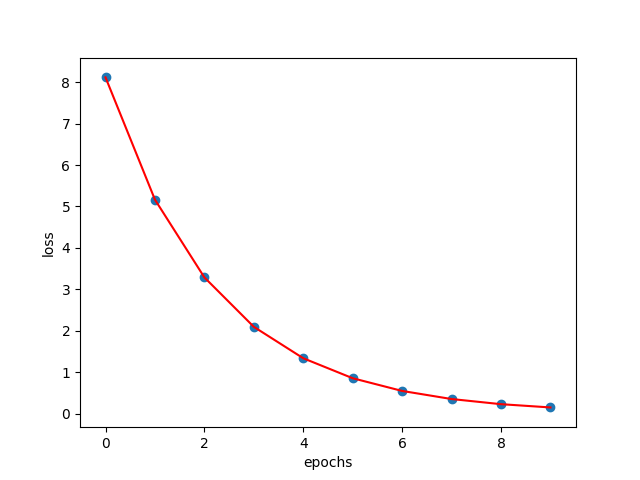

In [47]:
model = Model()
W_list, b_list, loss_list = [], [], []
epochs = list(range(10))
for epoch in epochs:
    #参数备份
    W_list.append(model.W.numpy())
    b_list.append(model.b.numpy())
    # 训练模型，并备份损失
    loss = model.train(inputs, gt_Y, learning_rate=0.1)
    loss_list.append(loss.numpy())
    print('epoch:{} - W={:0.2f}, b={:0.2f}, loss={:0.2f}'.format(
        epoch, W_list[-1], b_list[-1], loss_list[-1]))
plt.figure()
plt.plot(epochs, loss_list, 'r')
plt.scatter(epochs, loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

尝鲜tensorflow 2.0到这里就结束了。总体的使用体验是：tf2.0深度嵌入python，跟一般的python第三方库使用基本一致，打印中间变量，输出最终结果都非常方便。tensoflow是一个非常庞大的机器学习库，尝鲜完成之后就可以继续深入了解了。之后有时间我会写系列文章来讲述使用tensorflow2.0开发深度学习，并与其他框架进行比较。